In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1 = pd.read_csv("Bangalore_house_data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
df1['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [7]:
df2 = df1.drop(['society'],axis='columns')
df2.shape

(13320, 8)

# Data Cleaning: Handle NA values

In [8]:
df2.isnull().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

In [9]:
df2.shape

(13320, 8)

In [10]:
df3 = df2.dropna()
df3.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [11]:
df3.shape

(12710, 8)

# Feature Engineering
for bhk

In [12]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.bhk.unique()

/tmp/ipykernel_204373/2716584372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13])

In [13]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [14]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Super built-up Area,18-Mar,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,18-Dec,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,Ready To Move,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Super built-up Area,Ready To Move,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Super built-up Area,18-Sep,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
661,Super built-up Area,Ready To Move,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,Built-up Area,18-Mar,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4
772,Super built-up Area,20-Dec,Banashankari Stage VI,2 BHK,1160 - 1195,2.0,0.0,59.935,2


Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion.

In [15]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None  

In [16]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(2)

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4


In [17]:
df4.shape

(12668, 9)

In [18]:
df4.loc[30]

area_type       Super built-up  Area
availability                  19-Dec
location                   Yelahanka
size                           4 BHK
total_sqft                    2475.0
bath                             4.0
balcony                          0.0
price                          186.0
bhk                                4
Name: 30, dtype: object

# Add New feature called price per square feet

In [19]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [20]:
df5_stats = df5['price_per_sqft'].describe()
df5_stats

count    1.266800e+04
mean     6.876277e+03
std      2.263354e+04
min      2.678298e+02
25%      4.242721e+03
50%      5.376344e+03
75%      7.142857e+03
max      2.300000e+06
Name: price_per_sqft, dtype: float64

Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations

In [21]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats

Whitefield           514
Sarjapur  Road       372
Electronic City      302
Kanakpura Road       259
Thanisandra          233
                    ... 
Subbannaiah Palya      1
whitefiled             1
Medi Agrahara          1
Sadduguntepalya        1
Abshot Layout          1
Name: location, Length: 1248, dtype: int64

In [22]:
location_stats.values.sum()

12668

In [23]:
len(location_stats[location_stats>10])

235

In [24]:
len(location_stats)

1248

In [25]:
len(location_stats[location_stats<=10])

1013

Any location having less than 10 data points should be tagged as "other" location.

In [26]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Nagappa Reddy Layout     10
Dairy Circle             10
                         ..
Subbannaiah Palya         1
whitefiled                1
Medi Agrahara             1
Sadduguntepalya           1
Abshot Layout             1
Name: location, Length: 1013, dtype: int64

In [27]:
len(df5.location.unique())

1248

In [28]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

236

In [29]:
df5.head(10)

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,3247.863248
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3,4828.244275
10,Super built-up Area,18-Feb,Whitefield,3 BHK,1800.0,2.0,2.0,70.00,3,3888.888889
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4,10592.459605
12,Super built-up Area,Ready To Move,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,38.00,2,3800.000000


# Outlier Removal Using Business Logic

As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [30]:
df5[df5.total_sqft/df5.bhk<300].head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
58,Plot Area,Ready To Move,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Plot Area,Ready To Move,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,Plot Area,Ready To Move,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000
78,Built-up Area,Ready To Move,Kaval Byrasandra,2 BHK,460.0,1.0,0.0,22.0,2,4782.608696
89,Plot Area,Ready To Move,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.0,6,22535.211268


In [31]:
df5.shape

(12668, 10)

In [32]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12013, 10)

# Outlier Removal Using Standard Deviation and Mean

In [33]:
df6.price_per_sqft.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

In [34]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(9852, 10)

**Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like**

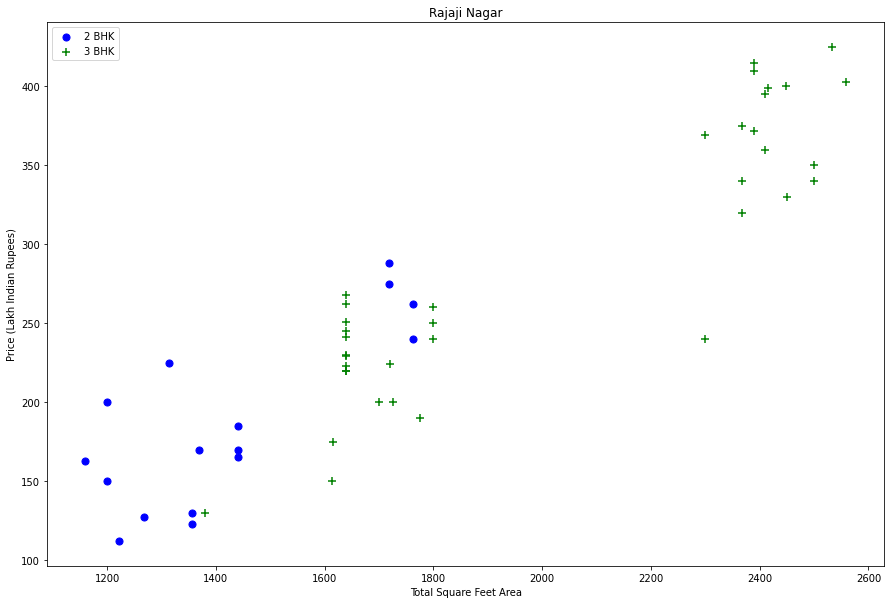

In [35]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

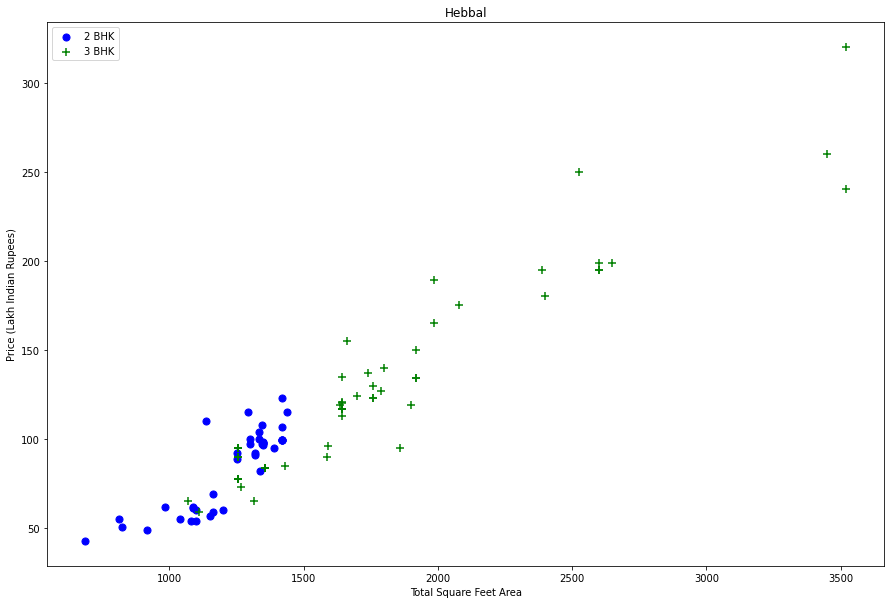

In [36]:
plot_scatter_chart(df7,"Hebbal")

In [37]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft)
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(5893, 10)

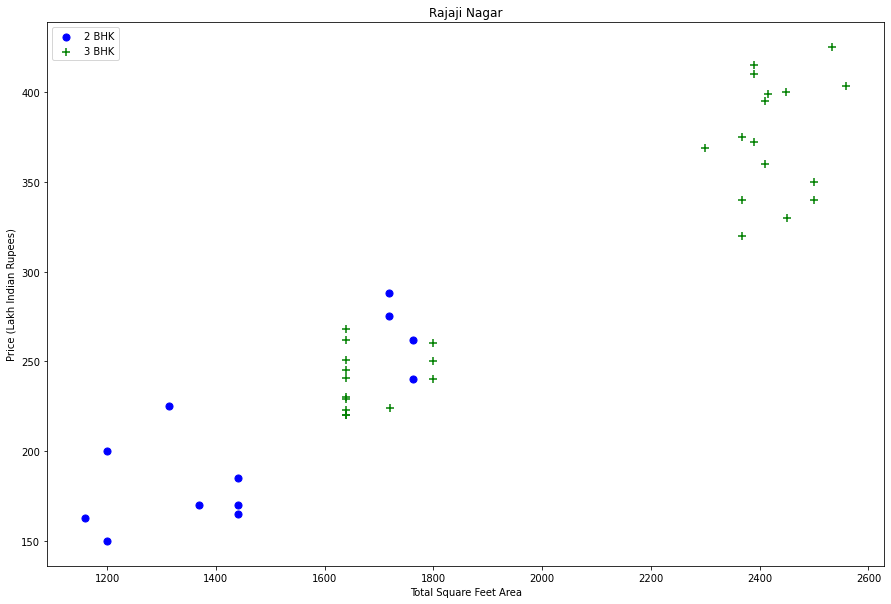

In [38]:
plot_scatter_chart(df8,"Rajaji Nagar")

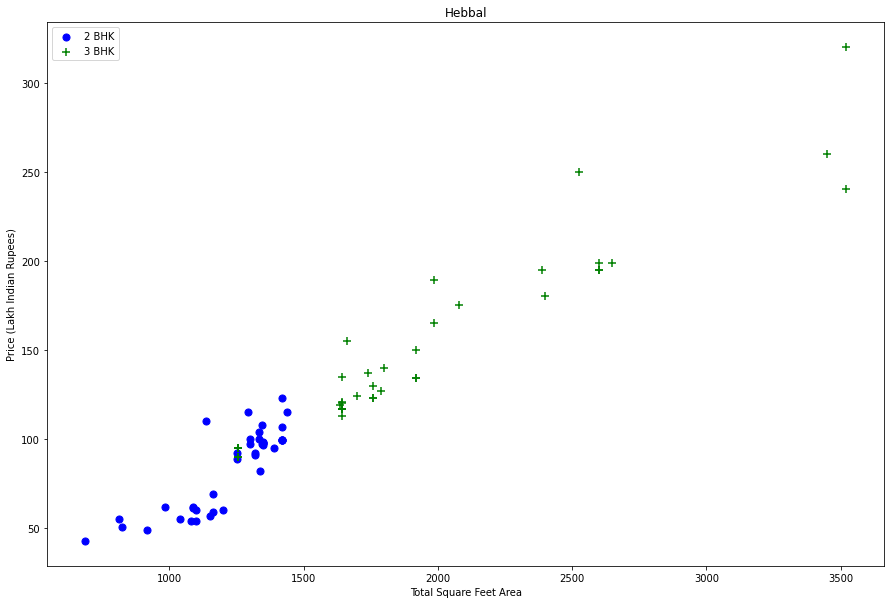

In [39]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'Count')

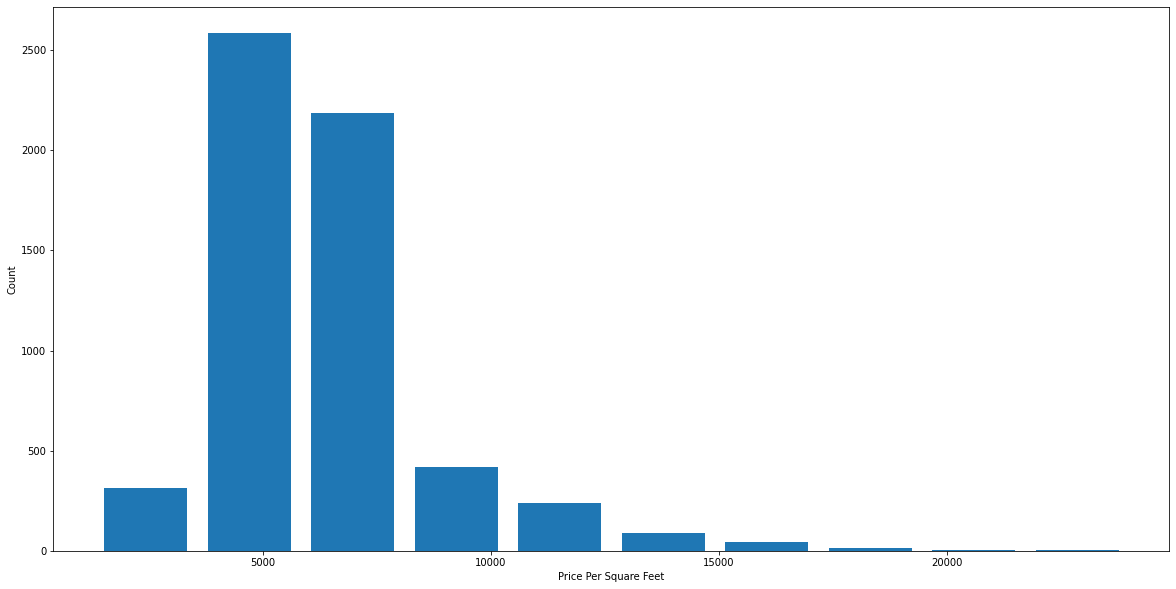

In [40]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

# Outlier Removal Using Bathrooms Feature

In [41]:
df8.bath.unique()

array([ 4.,  2.,  3.,  8.,  1.,  5.,  6.,  7.,  9., 13.])

Text(0, 0.5, 'Count')

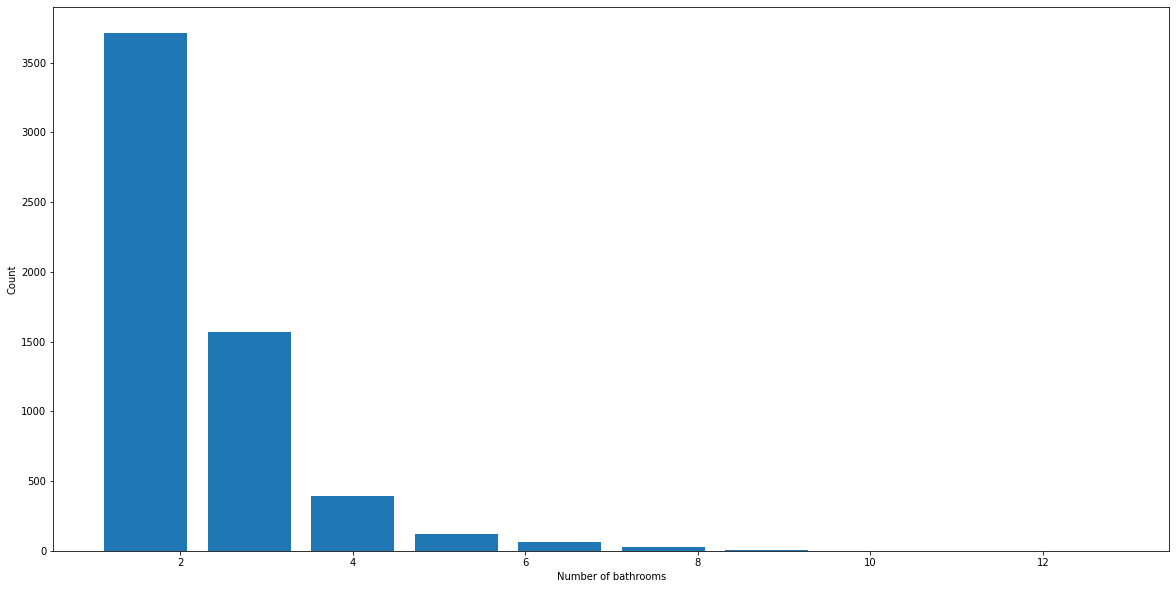

In [42]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [43]:
df8[df8.bath>10]

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
9267,Super built-up Area,Ready To Move,other,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424


It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [44]:
df8[df8.bath>df8.bhk+2]

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
6443,Super built-up Area,Ready To Move,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330
8082,Super built-up Area,Ready To Move,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689


In [45]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(5829, 10)

In [46]:
df9.head(2)

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,20-May,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15017.543860
2,Super built-up Area,Ready To Move,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3,12533.333333


# Adjusting availability

In [47]:
df9.groupby('availability')['availability'].count()

availability
15-Jun              1
16-Dec              3
16-Jul              1
16-Mar              1
16-Oct              1
                 ... 
22-Jun              1
22-Mar              2
22-May              1
22-Nov              2
Ready To Move    4601
Name: availability, Length: 68, dtype: int64

In [48]:
df9.availability.unique()

array(['20-May', 'Ready To Move', '18-Jun', '18-May', '22-Jun', '19-Dec',
       '20-Mar', '18-Jul', '19-Mar', '21-Sep', '18-Mar', '21-Dec',
       '18-Dec', '17-Jul', '17-Dec', '18-Aug', '18-Apr', '19-Oct',
       '18-Jan', '17-Aug', '20-Jan', '17-May', '18-Nov', '17-Oct',
       '18-Oct', '20-Dec', '20-Oct', '21-Feb', '19-Feb', '22-Dec',
       '19-Jan', '19-Jun', '19-Jul', '22-Jan', '19-Aug', '17-Jun',
       '18-Sep', '20-Jun', '19-Sep', '19-Nov', '17-Nov', '17-Apr',
       '18-Feb', '19-Apr', '21-Jul', '22-Nov', '16-Oct', '21-Mar',
       '20-Aug', '16-Dec', '20-Sep', '16-Mar', '22-May', '22-Mar',
       '21-Oct', '21-Jan', '17-Mar', '17-Sep', '21-May', '16-Sep',
       '21-Nov', '19-May', '17-Jan', '21-Jun', '20-Nov', '16-Jul',
       '15-Jun', '20-Apr'], dtype=object)

In [49]:
df9[df9.availability == 'Ready To Move'].shape

(4601, 10)

In [50]:
df10 = df9.copy()
df10["immediately_available"] = df9.availability.apply(lambda x: int(x=='Ready To Move'or x=='Immediate Possession'))
df10.head(10)

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft,immediately_available
0,Super built-up Area,20-May,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15017.543860,0
2,Super built-up Area,Ready To Move,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3,12533.333333,1
4,Super built-up Area,18-Jun,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.0,2,11983.805668,0
5,Super built-up Area,20-May,1st Block Jayanagar,4 BHK,2750.0,4.0,0.0,413.0,4,15018.181818,0
6,Super built-up Area,20-May,1st Block Jayanagar,4 BHK,2450.0,4.0,2.0,368.0,4,15020.408163,0
8,Super built-up Area,Ready To Move,1st Phase JP Nagar,3 BHK,1875.0,3.0,1.0,167.0,3,8906.666667,1
9,Super built-up Area,Ready To Move,1st Phase JP Nagar,3 BHK,2065.0,4.0,1.0,210.0,3,10169.491525,1
10,Super built-up Area,Ready To Move,1st Phase JP Nagar,3 BHK,2059.0,3.0,2.0,225.0,3,10927.634774,1
11,Super built-up Area,Ready To Move,1st Phase JP Nagar,2 BHK,1394.0,2.0,1.0,100.0,2,7173.601148,1
12,Super built-up Area,18-May,1st Phase JP Nagar,2 BHK,1077.0,2.0,2.0,93.0,2,8635.097493,0


In [51]:
df10[df10.location == 'Bommenahalli']

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft,immediately_available
1281,Plot Area,Ready To Move,Bommenahalli,3 Bedroom,1200.0,3.0,1.0,125.0,3,10416.666667,1
1282,Built-up Area,Ready To Move,Bommenahalli,4 Bedroom,1632.0,3.0,0.0,145.0,4,8884.803922,1
1286,Built-up Area,Ready To Move,Bommenahalli,3 Bedroom,3339.0,3.0,0.0,250.0,3,7487.271638,1
1287,Plot Area,Ready To Move,Bommenahalli,4 Bedroom,1355.0,3.0,0.0,135.0,4,9963.099631,1
1288,Plot Area,Ready To Move,Bommenahalli,3 Bedroom,1232.0,3.0,1.0,96.0,3,7792.207792,1
1289,Built-up Area,Ready To Move,Bommenahalli,4 Bedroom,1632.0,3.0,0.0,140.0,4,8578.431373,1


In [52]:
df11 = df10[~(df10.price == 2250)]
df11.head(10)

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft,immediately_available
0,Super built-up Area,20-May,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15017.543860,0
2,Super built-up Area,Ready To Move,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3,12533.333333,1
4,Super built-up Area,18-Jun,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.0,2,11983.805668,0
5,Super built-up Area,20-May,1st Block Jayanagar,4 BHK,2750.0,4.0,0.0,413.0,4,15018.181818,0
6,Super built-up Area,20-May,1st Block Jayanagar,4 BHK,2450.0,4.0,2.0,368.0,4,15020.408163,0
8,Super built-up Area,Ready To Move,1st Phase JP Nagar,3 BHK,1875.0,3.0,1.0,167.0,3,8906.666667,1
9,Super built-up Area,Ready To Move,1st Phase JP Nagar,3 BHK,2065.0,4.0,1.0,210.0,3,10169.491525,1
10,Super built-up Area,Ready To Move,1st Phase JP Nagar,3 BHK,2059.0,3.0,2.0,225.0,3,10927.634774,1
11,Super built-up Area,Ready To Move,1st Phase JP Nagar,2 BHK,1394.0,2.0,1.0,100.0,2,7173.601148,1
12,Super built-up Area,18-May,1st Phase JP Nagar,2 BHK,1077.0,2.0,2.0,93.0,2,8635.097493,0


In [53]:
df11.shape

(5829, 11)

In [54]:
df11[df11.location == 'Bommenahalli']

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft,immediately_available
1281,Plot Area,Ready To Move,Bommenahalli,3 Bedroom,1200.0,3.0,1.0,125.0,3,10416.666667,1
1282,Built-up Area,Ready To Move,Bommenahalli,4 Bedroom,1632.0,3.0,0.0,145.0,4,8884.803922,1
1286,Built-up Area,Ready To Move,Bommenahalli,3 Bedroom,3339.0,3.0,0.0,250.0,3,7487.271638,1
1287,Plot Area,Ready To Move,Bommenahalli,4 Bedroom,1355.0,3.0,0.0,135.0,4,9963.099631,1
1288,Plot Area,Ready To Move,Bommenahalli,3 Bedroom,1232.0,3.0,1.0,96.0,3,7792.207792,1
1289,Built-up Area,Ready To Move,Bommenahalli,4 Bedroom,1632.0,3.0,0.0,140.0,4,8578.431373,1


Text(0, 0.5, 'Count')

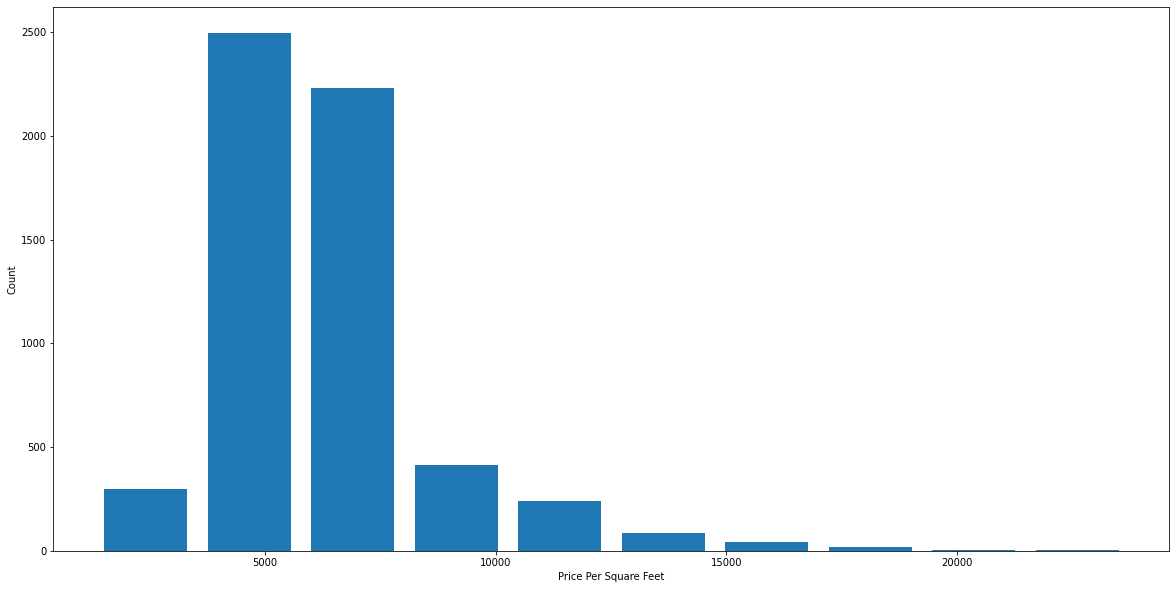

In [55]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df11.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [56]:
df12 = df11.drop(['availability','size','price_per_sqft'],axis='columns')
df12.head(3)

,area_type,location,total_sqft,bath,balcony,price,bhk,immediately_available
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,0
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,0


# Use One Hot Encoding For Location

In [57]:
dummies = pd.get_dummies(df12.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df13 = pd.concat([df12,dummies.drop('other',axis='columns')],axis='columns')
df13.head()

,area_type,location,total_sqft,bath,balcony,price,bhk,immediately_available,1st Block Jayanagar,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,Super built-up Area,1st Block Jayanagar,2750.0,4.0,0.0,413.0,4,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,Super built-up Area,1st Block Jayanagar,2450.0,4.0,2.0,368.0,4,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
df14 = df13.drop('location',axis='columns')
df14.head(2)

,area_type,total_sqft,bath,balcony,price,bhk,immediately_available,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Super built-up Area,2850.0,4.0,1.0,428.0,4,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,1875.0,2.0,3.0,235.0,3,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# One Hot Encoding For area_type

In [60]:
area_type_dummies = pd.get_dummies(df14.area_type)
area_type_dummies

,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,0,0,0,1
2,0,0,0,1
4,0,0,0,1
5,0,0,0,1
6,0,0,0,1
...,...,...,...,...
9842,0,0,0,1
9844,0,1,0,0
9845,0,0,0,1
9848,0,0,0,1


In [61]:
area_type_dummies = area_type_dummies.iloc[:,0:-1]
area_type_dummies

,Built-up Area,Carpet Area,Plot Area
0,0,0,0
2,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
...,...,...,...
9842,0,0,0
9844,0,1,0
9845,0,0,0
9848,0,0,0


In [62]:
df15 = pd.concat([df14,area_type_dummies], axis = 1)
df15.head()

,area_type,total_sqft,bath,balcony,price,bhk,immediately_available,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Built-up Area,Carpet Area,Plot Area
0,Super built-up Area,2850.0,4.0,1.0,428.0,4,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,1875.0,2.0,3.0,235.0,3,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,1235.0,2.0,2.0,148.0,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Super built-up Area,2750.0,4.0,0.0,413.0,4,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Super built-up Area,2450.0,4.0,2.0,368.0,4,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
df16 = df15.drop('area_type',axis='columns')
df16.head(2)

,total_sqft,bath,balcony,price,bhk,immediately_available,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Built-up Area,Carpet Area,Plot Area
0,2850.0,4.0,1.0,428.0,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,235.0,3,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Building a Model Now

In [64]:
df16.shape

(5829, 244)

In [65]:
X = df16.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,balcony,bhk,immediately_available,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Built-up Area,Carpet Area,Plot Area
0,2850.0,4.0,1.0,4,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,3,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
X.shape

(5829, 243)

In [67]:
y = df16.price
y.head(3)

0    428.0
2    235.0
4    148.0
Name: price, dtype: float64

In [68]:
len(y)

5829

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [70]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8611028940732317

In [71]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.78665457, 0.81075357, 0.7861937 , 0.7749744 , 0.8513156 ])

# Find best model using GridSearchCV

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

/home/shubham/Project/python_ds_env/ds_env/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/home/shubham/Project/python_ds_env/ds_env/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavi

/home/shubham/Project/python_ds_env/ds_env/lib/python3.8/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


,model,best_score,best_params
0,linear_regression,0.801978,{'normalize': False}
1,lasso,0.700079,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.670382,"{'criterion': 'mse', 'splitter': 'random'}"


ased on above results we can say that LinearRegression gives the best score. Hence we will use that.

# Test the model for few properties

In [79]:
def predict_price(area_type, Immediately_availabile, location, bhk, sqft, bath, balcony):    
    loc_index = np.where(X.columns==location)[0][0]
    area_type_index = np.where(X.columns==area_type)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = balcony
    x[3] = bhk
    availability = lambda x : int(x=='yes')
    x[4] = availability(Immediately_availabile)
    if loc_index >= 0:
        x[loc_index] = 1
    if area_type_index >= 0:
        x[area_type_index] = 1

    return lr_clf.predict([x])[0]

In [80]:
X.columns

Index(['total_sqft', 'bath', 'balcony', 'bhk', 'immediately_available',
       '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Phase JP Nagar',
       ...
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur', 'Built-up  Area',
       'Carpet  Area', 'Plot  Area'],
      dtype='object', length=243)

In [81]:
predict_price('Carpet  Area', 'yes','1st Phase JP Nagar',2, 1000, 2, 1)

/home/shubham/Project/python_ds_env/ds_env/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


94.86374590467224

In [83]:
predict_price('Carpet  Area', 'yes','Indira Nagar',2, 1000, 2, 1)

/home/shubham/Project/python_ds_env/ds_env/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


208.20422009828556

# Export the tested model to a pickle file

In [77]:
# import pickle
# with open('banglore_home_prices_model.pickle','wb') as f:
#     pickle.dump(lr_clf,f)

# Export location and column information to a file that will be useful later on in our prediction application

In [78]:
# import json
# columns = {
#     'data_columns' : [col.lower() for col in X.columns]
# }
# with open("columns.json","w") as f:
#     f.write(json.dumps(columns))